In [5]:
#import libraries
import os
import pandas as pd
import numpy as np


NameError: name 'utf' is not defined

In [4]:
#Set the working directory

os.chdir("C:\Users\kanch\Desktop\project")
os.getcwd()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-4-2a3e38d3559c>, line 3)

In [6]:
#read the data
bike_data = pd.read_csv("day.csv", encoding = 'ISO - 8859 -1')

FileNotFoundError: [Errno 2] File b'day.csv' does not exist: b'day.csv'

In [7]:
#Check shape
bike_data.shape

NameError: name 'bike_data' is not defined

In [8]:
#Check for missing value
bike_data.isnull().sum()

NameError: name 'bike_data' is not defined

In [10]:
#The data set does not contain any missing value
bike_data.info()

NameError: name 'bike_data' is not defined

In [12]:
#Convert the required data type 

#Convert into category
for col in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
        bike_data[col] = bike_data[col].astype('object')

NameError: name 'bike_data' is not defined

In [13]:
#Convert into Numericals

for col in ['instant','temp','atemp','hum','windspeed','casual','registered','cnt']:
        bike_data[col] = bike_data[col].astype('float')

NameError: name 'bike_data' is not defined

In [14]:
from datetime import datetime

In [15]:
bike_data['dteday'].apply(str)


NameError: name 'bike_data' is not defined

In [16]:
#Convert the Date variable

bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

NameError: name 'bike_data' is not defined

In [17]:
#Check for missing values

bike_data.isnull().sum()

NameError: name 'bike_data' is not defined

In [18]:
#There is no missing value present in the given dataset

#Outlier Analysis

cnames = ["instant","temp","atemp","hum","windspeed","casual","registered","cnt"]

In [19]:
#Select and Remove the outliers

for i in cnames:
    q75 , q25 = np.percentile(bike_data.loc[:,i],[75,25])
    iqr = q75  -  q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print(min)
    print(max)
    
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] < min].index)
    bike_data = bike_data.drop(bike_data[bike_data.loc[:,i] > max].index)

NameError: name 'bike_data' is not defined

In [20]:
print(min)


<built-in function min>


In [21]:
print(max)

<built-in function max>


In [22]:
bike_data.shape

NameError: name 'bike_data' is not defined

In [23]:
#Feature Selection

corr_plot = bike_data.loc[:,cnames]
corr_plot.info()

NameError: name 'bike_data' is not defined

In [24]:
import seaborn as sns

In [25]:
get_ipython().magic('matplotlib inline')

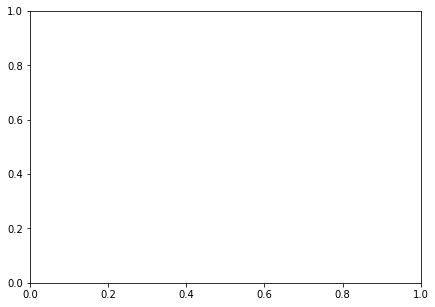

In [26]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))

In [27]:
#Generate Correlation Matrix

corr = corr_plot.corr()


NameError: name 'corr_plot' is not defined

In [28]:
#plot using seaborn library


sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 50, as_cmap=True),square=True, ax=ax)

NameError: name 'corr' is not defined

In [29]:
#temp and atemp can be observed as they are highly correlated
#Thus we need to drop one of them
#Temp is the actual temperature whereas atemp is the feeling value of temperature
#Feeling temperature is more impprtant when it comes to real life


#Also casual, registered and cnt are positively correlated
#Moreover sum of casual and registered forms cnt variable

In [30]:
#get variable names 
bike_data.columns.values



NameError: name 'bike_data' is not defined

In [31]:
bike_data = bike_data.drop(["instant","casual","registered","temp","dteday"],axis = 1)

NameError: name 'bike_data' is not defined

In [32]:
bike_data.columns.values

NameError: name 'bike_data' is not defined

In [33]:
#Till here, our features are selected and they are already normalized.
# We don't need to perform feature scaling
bike_data.to_csv("Clean_bike_data_python.csv",sep="\t")

NameError: name 'bike_data' is not defined

In [34]:
#Regression Model Development 
#Decision Tree Model

from random import randrange, uniform


In [36]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
bike_data = bike_data.drop(["dteday"],axis=1)

NameError: name 'bike_data' is not defined

In [37]:
#Divide the data into two part for training the model and testing the model

x = bike_data.values[:, 0:10]
y = bike_data.values[:,10]
y = y.astype('int')

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)

NameError: name 'bike_data' is not defined

In [38]:
from sklearn import tree
import numpy as np


In [39]:
c50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [40]:
#predict new test cases
C50_Predictions = C50_model.predict(x_test)


NameError: name 'C50_model' is not defined

In [41]:
#Create a definition of RMSLE error coefficient

def rmsle(target, predicted):
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in target]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in predicted]))
    calc = (log1 - log2) **2
    return np.sqrt(np.mean(calc))


In [42]:
print("RMSLE Value :", rmsle(y_test,C50_Predictions))


NameError: name 'y_test' is not defined

In [43]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 20).fit(x_train, y_train)


NameError: name 'x_train' is not defined

In [44]:
#Predict values using Random Forest Model
rf_predictions = rf_model.predict(x_test)


NameError: name 'rf_model' is not defined

In [45]:
#Check RMSLE error coefficient

print("RMSLE Value: ", rmsle(y_test,rf_predictions))

NameError: name 'y_test' is not defined